In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, zero_one_loss

In [2]:
X_train = pd.read_csv("X_train.csv")
X_train.shape

(125973, 118)

In [3]:
X_test = pd.read_csv("X_test.csv")
X_test.shape

(22544, 118)

In [4]:
y_train = pd.read_csv("y_train.csv")
y_train.shape

(125973, 1)

In [5]:
y_test = pd.read_csv("y_test.csv")
y_test.shape

(22544, 1)

In [6]:
X_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
y_train.head()

,attack_category
0,benign
1,benign
2,dos
3,benign
4,benign


In [8]:
col_names = np.array(X_train.columns.tolist())

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(X_train[numeric_cols])

StandardScaler()

In [11]:
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])

In [12]:
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [13]:
X_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,1.259730e+05,1.259730e+05,1.259730e+05,125973.000000,1.259730e+05,1.259730e+05,125973.000000,1.259730e+05,1.259730e+05,1.259730e+05,...,125973.00000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,2.549477e-17,4.556674e+04,1.977911e+04,0.000198,4.230328e-19,4.455945e-18,0.204409,2.989431e-18,1.558171e-17,-6.549957e-18,...,0.08917,0.012399,0.000818,0.019218,0.276655,0.002897,0.001008,0.000389,0.594929,0.002151
std,1.000004e+00,5.870331e+06,4.021269e+06,0.014086,1.000004e+00,1.000004e+00,2.149968,1.000004e+00,1.000004e+00,1.000004e+00,...,0.28499,0.110661,0.028583,0.137292,0.447346,0.053750,0.031736,0.019719,0.490908,0.046332
min,-1.102492e-01,0.000000e+00,0.000000e+00,0.000000,-8.948642e-02,-7.735985e-03,0.000000,-2.702282e-02,-8.092618e-01,-1.166364e-02,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.102492e-01,0.000000e+00,0.000000e+00,0.000000,-8.948642e-02,-7.735985e-03,0.000000,-2.702282e-02,-8.092618e-01,-1.166364e-02,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.102492e-01,4.400000e+01,0.000000e+00,0.000000,-8.948642e-02,-7.735985e-03,0.000000,-2.702282e-02,-8.092618e-01,-1.166364e-02,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,-1.102492e-01,2.760000e+02,5.160000e+02,0.000000,-8.948642e-02,-7.735985e-03,0.000000,-2.702282e-02,1.235694e+00,-1.166364e-02,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.636428e+01,1.379964e+09,1.309937e+09,1.000000,1.174348e+01,2.088191e+02,77.000000,1.104972e+02,1.235694e+00,3.123689e+02,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
y_train_bin = y_train.apply(lambda x: 0 if x is "benign" else 1)
y_test_bin = y_test.apply(lambda x: 0 if x is "benign" else 1)

In [15]:
y_train.value_counts().apply(lambda x: x/float(len(y_train)))

attack_category
benign             0.534583
dos                0.364578
probe              0.092528
r2l                0.007899
u2r                0.000413
dtype: float64

In [16]:
y_test.value_counts().apply(lambda x: x/float(len(y_test)))

attack_category
benign             0.430758
dos                0.338715
r2l                0.114177
probe              0.107479
u2r                0.008872
dtype: float64

In [17]:
y_train.value_counts()

attack_category
benign             67343
dos                45927
probe              11656
r2l                  995
u2r                   52
dtype: int64

In [18]:
sm = SMOTE(sampling_strategy="auto", random_state=42)

In [19]:
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [20]:
y_train_sm.value_counts()

attack_category
u2r                67343
r2l                67343
probe              67343
dos                67343
benign             67343
dtype: int64

In [21]:
clf = DecisionTreeClassifier(random_state=42)

In [22]:
clf.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(random_state=42)

In [23]:
y_preds = clf.predict(X_test)

In [24]:
print(classification_report(y_test, y_preds, target_names=y_test["attack_category"].unique().tolist()))

              precision    recall  f1-score   support

         dos       0.68      0.97      0.80      9711
      benign       0.96      0.69      0.80      7636
       probe       0.59      0.69      0.64      2423
         r2l       0.68      0.06      0.11      2574
         u2r       0.48      0.07      0.12       200

    accuracy                           0.73     22544
   macro avg       0.68      0.50      0.50     22544
weighted avg       0.76      0.73      0.70     22544



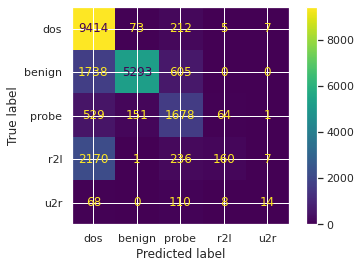

In [25]:
cm = confusion_matrix(y_test, y_preds)
cm_plot = ConfusionMatrixDisplay(cm, display_labels=y_test["attack_category"].unique().tolist())
cm_plot.plot()
plt.show()

In [26]:
err = zero_one_loss(y_test, y_preds)
print(f"Error: {round(err, 3)}")

Error: 0.265
